In [153]:
from sklearn.linear_model import Perceptron
import os
import pandas
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
import numpy
from sklearn.preprocessing import LabelEncoder

In [100]:
path = os.path.dirname(os.path.dirname(os.path.abspath(__name__)))
data_path = os.path.join(path, 'data')

def explorer(name, extension='csv'):
    name = name + '.' + extension
    path = os.path.join(data_path, name)
    return path if os.path.exists(path) else None

In [121]:
data = pandas.read_csv(explorer('parcours_bachelier'))
columns = ['sexe_lib', 'mention_bac_lib', 'serie_bac_lib', 'discipline_lib', 'redoublement_en_l1']
results = pandas.DataFrame(data=data, columns=columns)
results.loc[5:10]

,sexe_lib,mention_bac_lib,serie_bac_lib,discipline_lib,redoublement_en_l1
5,Homme,Assez bien,BAC ES,Sciences humaines et sociales,0.0
6,Femme,Passable premier groupe,BAC ES,Langues,39.0
7,Femme,Inconnue,BAC ES,Langues,2.0
8,Homme,Passable premier groupe,BAC STMG,Sciences humaines et sociales,0.0
9,Femme,Passable deuxième groupe,BAC technologique hors STMG,Sciences humaines et sociales,1.0
10,Homme,Très bien,BAC STMG,Administration économique et sociale,0.0


In [144]:
# We have to fix the null values
results['redoublement_en_l1'] = results['redoublement_en_l1'].fillna(0)

In [145]:
# The encoding of the labels in the original file aren't that
# great so we'll fit_transform the labels to something we can
# can trust better
encoder = LabelEncoder()
results['sexe'] = encoder.fit_transform(results['sexe_lib'])
results['serie_bac'] = encoder.fit_transform(results['serie_bac_lib'])
results['mention_bac'] = encoder.fit_transform(results['mention_bac_lib'])
results['discipline'] = encoder.fit_transform(results['discipline_lib'])
results.head()

,sexe_lib,mention_bac_lib,serie_bac_lib,discipline_lib,redoublement_en_l1,sexe,serie_bac,mention_bac,discipline
0,Homme,Inconnue,BAC STMG,Langues,0.0,1,3,2,2
1,Homme,Passable deuxième groupe,BAC STMG,Sciences humaines et sociales,4.0,1,3,3,10
2,Femme,Inconnue,BAC technologique hors STMG,Langues,1.0,0,5,2,2
3,Homme,Très bien,BAC professionnel,Langues,0.0,1,4,5,2
4,Femme,Passable deuxième groupe,BAC technologique hors STMG,Sciences humaines et sociales,12.0,0,5,3,10


In [146]:
# results.to_csv(path_or_buf='test_data.csv')

In [147]:
results.groupby(['mention_bac_lib'])['sexe'].count()

mention_bac_lib
Assez bien                  1080
Bien                         796
Inconnue                     848
Passable deuxième groupe    1112
Passable premier groupe     1220
Très bien                    452
Name: sexe, dtype: int64

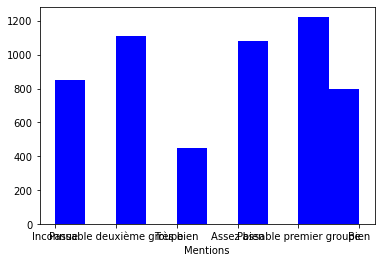

In [148]:
pyplot.hist(results['mention_bac_lib'], color='blue')
pyplot.xlabel('Mentions')
pyplot.show()

In [150]:
new_dataframe = results[['sexe', 'serie_bac', 'mention_bac', 'discipline', 'redoublement_en_l1']]
# new_dataframe.iloc[10:20]
new_dataframe.to_csv(path_or_buf='test_data.csv')

In [151]:
new_dataframe

,sexe,serie_bac,mention_bac,discipline,redoublement_en_l1
0,1,3,2,2,0.0
1,1,3,3,10,4.0
2,0,5,2,2,1.0
3,1,4,5,2,0.0
4,0,5,3,10,12.0
...,...,...,...,...,...
5503,0,3,4,8,0.0
5504,1,4,0,10,8.0
5505,0,5,2,2,1.0
5506,0,3,0,2,0.0


In [155]:
X = new_dataframe[['sexe']]
y = new_dataframe['discipline']

In [156]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [158]:
model = Perceptron()
model.fit(X_train, y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=1.0,
           fit_intercept=True, max_iter=1000, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=0, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [161]:
predictions = model.predict(X_test)
print(predictions)

[10 10 10 ... 10 10 10]


In [165]:
model.score(X, y)

0.25326797385620914

In [166]:
from sklearn.manifold import TSNE

In [172]:
w = TSNE(n_components=3).fit(new_dataframe[['discipline', 'mention_bac']])
w.shape

AttributeError: 'TSNE' object has no attribute 'shape'